In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

## Extract the images as pixel values

In [2]:
path = '../Data/Images'
folders = os.listdir(path)

In [4]:
image_label_tuples = []

In [5]:
for folder in folders:
    
    # Label as healthy or diseased
    if folder.endswith('healthy'):
        label = 1
    else:
        label = 0
    
    # Iterate through the folders
    folder_images = os.listdir(path + '/' + folder)
    folder_path = path + '/' + folder + '/'
    
    # Extract images from each folder
    for image in folder_images:
        image_path = os.path.join(folder_path, image)
        image_path = Image.open(image_path)
        
        # Convert image to pixel values
        pixel_values = np.array(image_path)
        
        # Add image and label
        image_label_tuples.append((pixel_values, label))

In [6]:
len(image_label_tuples)

10646

### Count the number of healthy vs diseased

In [7]:
count = 0

for tuple in image_label_tuples:
    if tuple[1] == 1:
        count += 1
    else:
        None

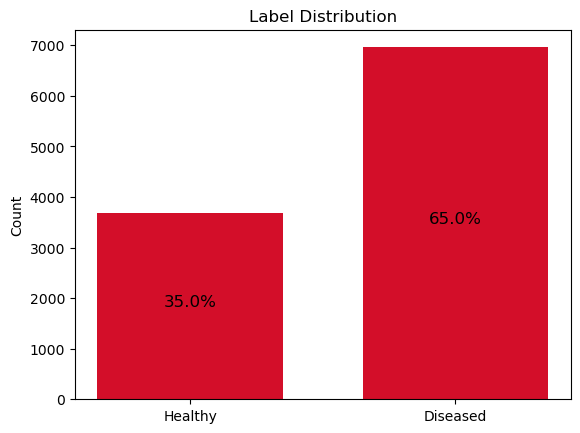

In [23]:
labels = ['Healthy', 'Diseased']
values = [count, len(image_label_tuples) - count]

total = len(image_label_tuples)
percentages = [(count/total), (total-count)/total]
percentages = np.round(percentages,2) *100

# Plotting the bar chart
plt.bar(labels, values, width = 0.7, color = '#d30e29')

for i in range(2):
    plt.text(i, values[i]/2, str(percentages[i]) + '%', ha='center', fontsize = 12)

plt.ylabel('Count')
plt.title('Label Distribution')
plt.savefig('../Figures/Label Distribution')
plt.show()